# PCA tutorial from
https://districtdatalabs.silvrback.com/principal-component-analysis-with-python

In [1]:
#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
#from wpca import PCA
from sklearn.decomposition import PCA
import seaborn as sns

C:\Users\Will\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#Load movie names and movie ratings
movies = pd.read_csv('https://raw.githubusercontent.com/warriorkitty/orientlens/master/movielens/movies.csv')
ratings = pd.read_csv('https://raw.githubusercontent.com/warriorkitty/orientlens/master/movielens/ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [3]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]

ratings.movieId = ratings.movieId.map(replace_name)

M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape

df1 = M.replace(np.nan, 0, regex=True)
X_std = StandardScaler().fit_transform(df1)

In [5]:
m

(718, 8913)

In [6]:
#Create covariance matrix based on standardized data
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

#Can do same matrix with one line of code
#cov_mat = np.cov(X_std.T)

Covariance matrix 
[[ 1.0013947  -0.00276421 -0.00195661 ..., -0.00858289 -0.00321221
  -0.01055463]
 [-0.00276421  1.0013947  -0.00197311 ...,  0.14004611 -0.0032393
  -0.01064364]
 [-0.00195661 -0.00197311  1.0013947  ..., -0.00612653 -0.0022929
  -0.00753398]
 ..., 
 [-0.00858289  0.14004611 -0.00612653 ...,  1.0013947   0.02888777
   0.14005644]
 [-0.00321221 -0.0032393  -0.0022929  ...,  0.02888777  1.0013947
   0.01676203]
 [-0.01055463 -0.01064364 -0.00753398 ...,  0.14005644  0.01676203
   1.0013947 ]]


In [ ]:
#Perform eigenvector decomposition on the covariance matrix
"""cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)"""

#Too slow!  Crashes computer

In [7]:
pca2 = PCA(n_components=2)

In [9]:
#2-component PCA
pca2.fit_transform(df1)
print pca2.explained_variance_ratio_

[ 0.13379809  0.03977444]


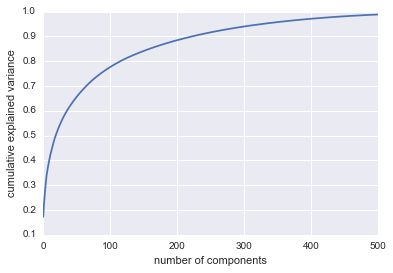

In [8]:
%matplotlib inline

#Now a more complete PCA with a scree plot to show variance explained by each component
pca = PCA(n_components=500).fit(X_std) #remember X_std is already a transformed version of df1
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()